# Notebook #5: Predicciones

In [5]:
%load_ext autoreload
%autoreload 2

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Para realizar la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.model_selection import train_test_split,GridSearchCV

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Librería para el acceso a variables y funciones
# -----------------------------------------------------------------------
import sys
sys.path.append("../../")
from src import soporte_modelos as sm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- El primer paso consiste en cargar los datos ya estandarizados.

In [6]:
df = pd.read_pickle('../../datos/pickles_transformados/modelo1/df_estandarizado.pkl')

- Nos aseguramos de que todo el conjunto sea de formato numérico.

In [7]:
df = df.astype(float)

- Separamos la "X" y la "y", donde la X será el cojunto de datos sin la variable respuesta, y la "y" será solamente la variable respuesta, en este caso, "Attrition".

In [8]:
X = df.drop("Attrition", axis = 1)
y = df[["Attrition"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

- Definimos un diccionario de hiperparámetros:

In [9]:
parametros_default = {
            "tree": {
                'max_depth': [3, 5, 10],
                'min_samples_split': [2, 10, 15],
                'min_samples_leaf': [1, 4, 8]
            },
            "random_forest": {
                'n_estimators': [50, 100, 200],
                'max_depth': [2, 6, 8, 20, 12, 16],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [4, 6, 8]
            },
            "gradient_boosting": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1, 0.2],
                'max_depth': [3, 4, 5],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'subsample': [0.8, 1.0]
            },
            "xgboost": {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.05, 0.1],
                'max_depth': [5, 7, 9],
                'min_child_weight': [1, 3, 5],
                'subsample': [0.8, 1.0],
                'colsample_bytree': [0.8, 1.0]
            }}

- Instanciamos la clase "AnalisisModelosClasificacion"

In [10]:
analisis_mod_clas = sm.AnalisisModelosClasificacion(df, "Attrition")

- Y aplicamos los modelos: regresión logística, Decision Tree, Random Forest, Gradient Boost y XGBoost.

In [ ]:
analisis_mod_clas.ajustar_modelo("logistic_regression")
df_lg = analisis_mod_clas.calcular_metricas("logistic_regression")
df_lg["modelo"] = "logistic_regression"
df_lg

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.837639,0.828010,0.837639,0.768590,0.038343,0.746361,0.000895,NaN,NaN,NaN,logistic_regression
test,0.861502,0.860904,0.861502,0.804815,0.077973,0.793659,NaN,NaN,0.000895,NaN,logistic_regression


In [ ]:
analisis_mod_clas.ajustar_modelo("tree")
df_tree = analisis_mod_clas.calcular_metricas("tree")
df_tree["modelo"] = "tree"
df_tree

Fitting 5 folds for each of 36 candidates, totalling 180 fits
El mejor modelo es DecisionTreeClassifier(max_depth=10, random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.956547,0.956457,0.956547,0.954687,0.829673,0.959035,0.001089,8.0,NaN,NaN,tree
test,0.894366,0.888650,0.894366,0.890841,0.544726,0.811006,NaN,NaN,0.001089,8.0,tree


In [ ]:
analisis_mod_clas.ajustar_modelo("random_forest", param_grid=parametros_default["random_forest"])
df_rf = analisis_mod_clas.calcular_metricas("random_forest")
df_rf["modelo"] = "random_forest"
df_rf

Fitting 5 folds for each of 162 candidates, totalling 810 fits
El mejor modelo es RandomForestClassifier(max_depth=20, min_samples_leaf=4, n_estimators=50,
                       n_jobs=-1, random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.963006,0.964576,0.963006,0.961077,0.852723,0.999883,0.028126,-1.0,NaN,NaN,random_forest
test,0.902582,0.907663,0.902582,0.882044,0.462072,0.942721,NaN,NaN,0.028126,-1.0,random_forest


In [ ]:
analisis_mod_clas.ajustar_modelo("gradient_boosting", param_grid=parametros_default["gradient_boosting"])
df_gb = analisis_mod_clas.calcular_metricas("gradient_boosting")
df_gb["modelo"] = "gradient_boost"
df_gb

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
El mejor modelo es GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_leaf=4,
                           n_estimators=200, random_state=42)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.015407,8.0,NaN,NaN,gradient_boost
test,0.969484,0.970134,0.969484,0.968081,0.865574,0.986472,NaN,NaN,0.015407,8.0,gradient_boost


In [ ]:
analisis_mod_clas.ajustar_modelo("xgboost", param_grid=parametros_default["xgboost"])
df_xgb = analisis_mod_clas.calcular_metricas("xgboost")
df_xgb["modelo"] = "x_gradient_boost"
df_xgb

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.011211,NaN,NaN,NaN,x_gradient_boost
test,0.971831,0.972366,0.971831,0.970657,0.876821,0.984454,NaN,NaN,0.011211,NaN,x_gradient_boost


## Análisis de Métricas de los Modelos

- Nos interesa priorizar el recall, que es lo mismo que decir que, daremos prioridad a los Verdaderos Positivos.

- Consecuentemente, minimizaremos los Falsos Negativos, es decir, preferimos que el modelo nos diga que un empleado se marchará de la empresa aunque finalmente no sea así, pero queremos evitar el error (Falso Negativo) de decir que se queda cuando finalmente se acabará yendo.

In [16]:
df_completo = pd.concat([df_lg, df_tree, df_rf, df_gb, df_xgb])
df_completo.reset_index(drop=True, inplace=True)
df_completo.style.apply(sm.color_filas_por_modelo, axis = 1)

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
0,0.837639,0.828010,0.837639,0.768590,0.038343,0.746361,0.000895,nan,nan,nan,logistic_regression
1,0.861502,0.860904,0.861502,0.804815,0.077973,0.793659,nan,nan,0.000895,nan,logistic_regression
2,0.956547,0.956457,0.956547,0.954687,0.829673,0.959035,0.001089,8.000000,nan,nan,tree
3,0.894366,0.888650,0.894366,0.890841,0.544726,0.811006,nan,nan,0.001089,8.000000,tree
4,0.963006,0.964576,0.963006,0.961077,0.852723,0.999883,0.028126,-1.000000,nan,nan,random_forest
5,0.902582,0.907663,0.902582,0.882044,0.462072,0.942721,nan,nan,0.028126,-1.000000,random_forest
6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.015407,8.000000,nan,nan,gradient_boost
7,0.969484,0.970134,0.969484,0.968081,0.865574,0.986472,nan,nan,0.015407,8.000000,gradient_boost
8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.011211,nan,nan,nan,x_gradient_boost
9,0.971831,0.972366,0.971831,0.970657,0.876821,0.984454,nan,nan,0.011211,nan,x_gradient_boost


- Por las métricas, algunos de nuestros modelos -GradientBoost y XGBoost- estarían acertando en sus predicciones en más del 85% de las ocasiones, siendo las áreas bajo la curva casi 1 para el test en ambos casos, lo que indica que tienen una fiabilidad muy elevada. Por su parte, el recall es del 97% en ambos casos, lo que quiere decir que estamos priorizando el recall.

- Sabemos sin embargo, que en este conjunto de datos tenemos unos 2800 duplicados (de un conjunto de unos 4400), lo que quiere decir que, es muy probable que los modelos sean capaces de predecir bien por la cantidad de datos duplicados en el conjunto.

- Por ese motivo, no consideramos que sea un conjunto de datos adecuado para entrenar al modelo. Así, no continuaremos con el análisis de estos modelos.

## Representaciones gráficas de los modelos

- Como complemento a las métricas anteriores, podemos visualizar los resultados obtenidos de nuestros modelos:

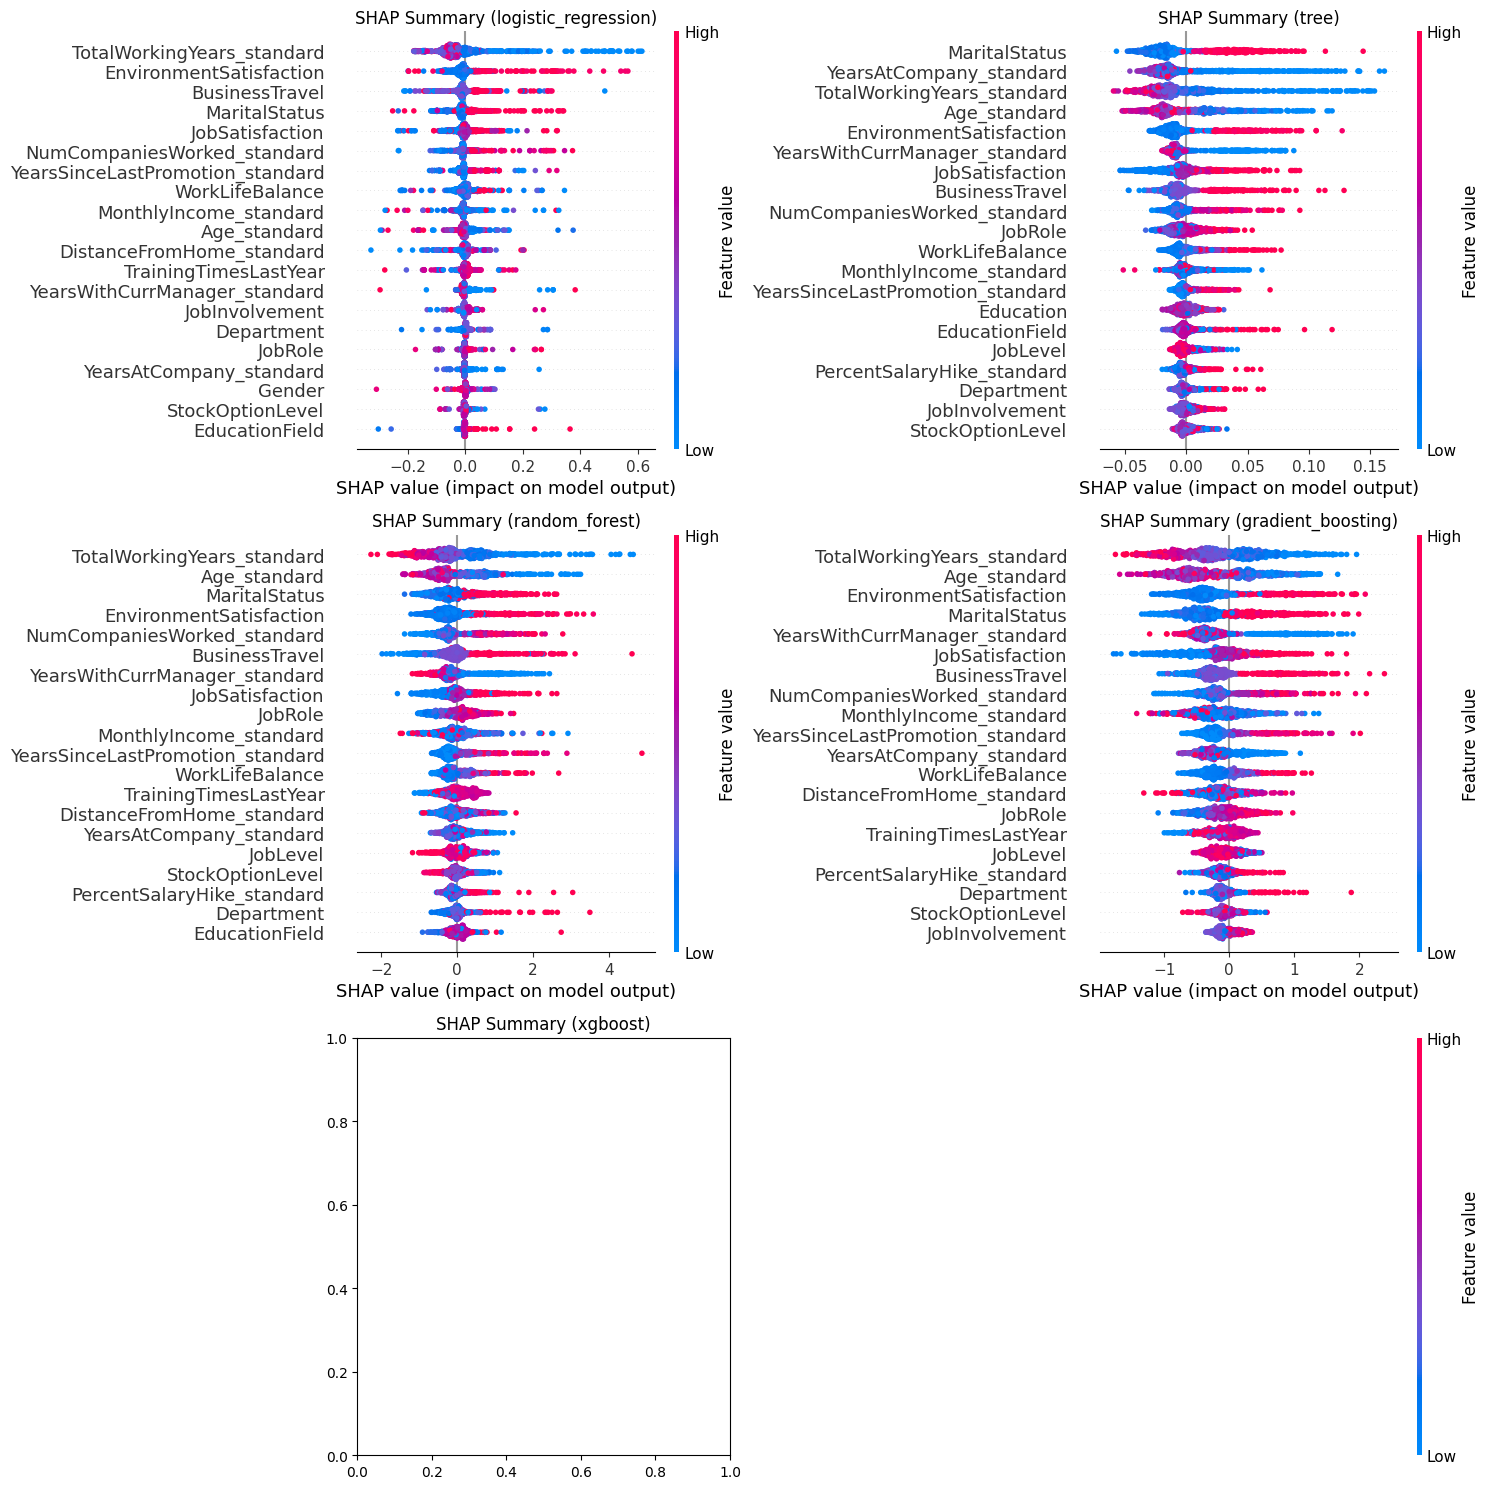

In [17]:
analisis_mod_clas.shap_plots(["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"], plot_size=(15, 15), figsize=(10, 5))

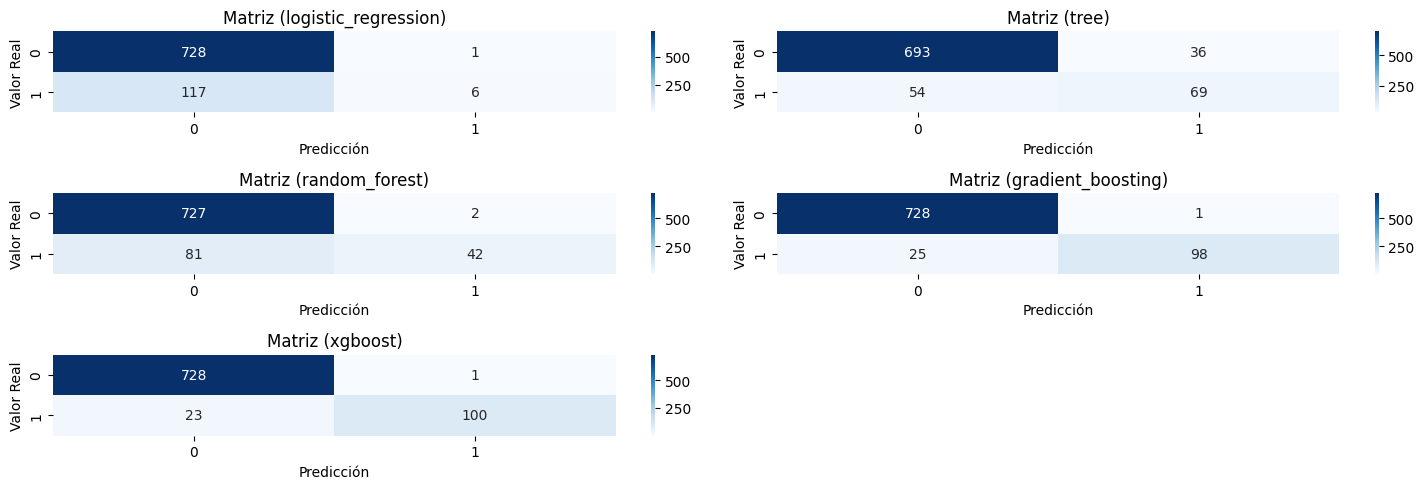

In [18]:
analisis_mod_clas.matrices_confusion(["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"], figsize=(15,5))

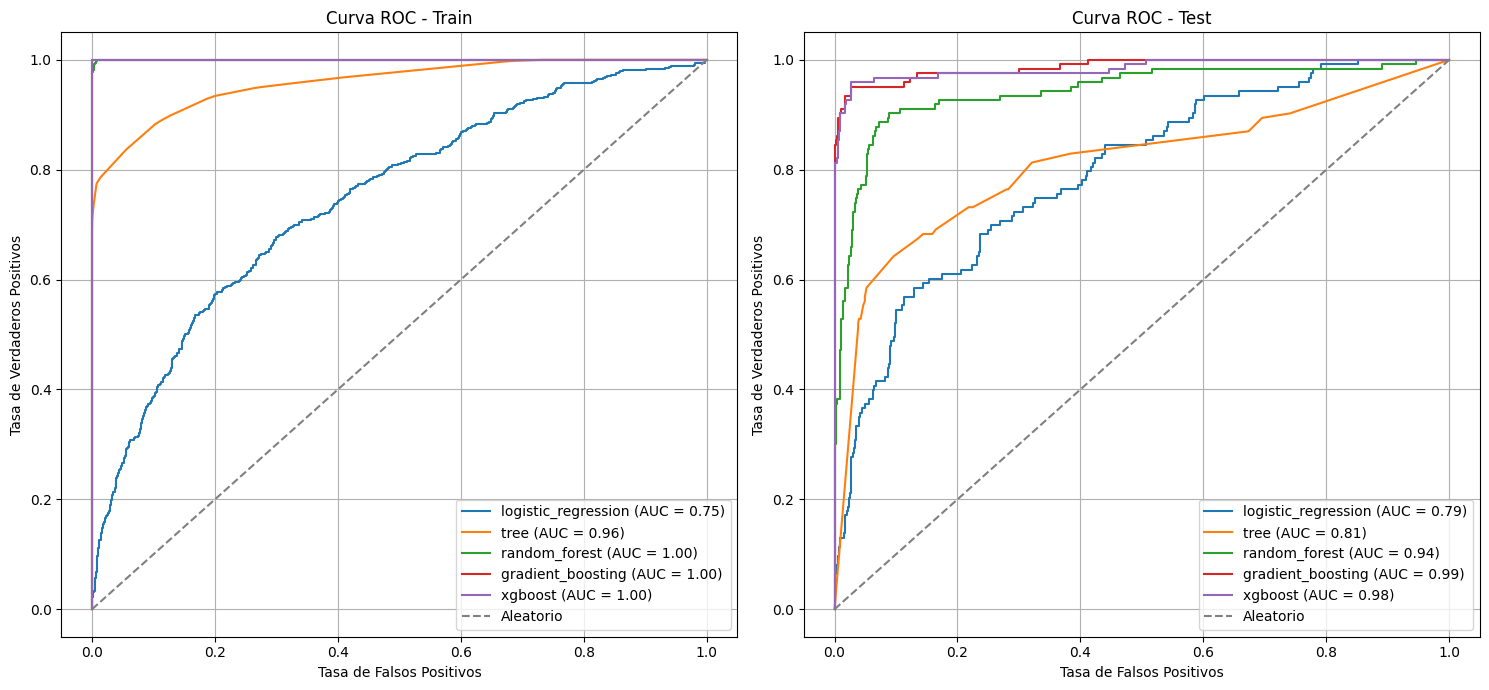

In [19]:
analisis_mod_clas.curvas_roc_combinadas(["logistic_regression", "tree", "random_forest", "gradient_boosting", "xgboost"])